## Observations and Insights 

In [ ]:
# Mice that were treated with Capomulin had the tumor shrink over time. 
# Capomulin has the smallest IQR, meaning the data is closer to the mean for this treatment. 
# Based on the linear regression model for Capomulin, there was a positive correlation between the weight of the mouse and the tumor volume.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

In [2]:
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = len(study_data["Mouse ID"].unique())
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_data.loc[study_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = study_data[study_data["Mouse ID"].isin(duplicate_mouse) == False]
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_study["Mouse ID"].unique())
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_summary = clean_study.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = study_summary.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = study_summary.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = study_summary.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_deviation = study_summary.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = study_summary.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

study_analysis = pd.DataFrame({"Mean Total Volume":mean,"Median Total Volume":median,"Variance":variance, "Standard Deviation": standard_deviation, "SEM": sem})
study_analysis


,Mean Total Volume,Median Total Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Counts')

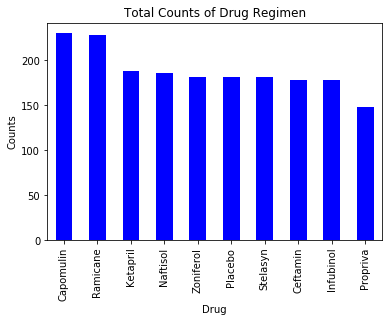

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = clean_study["Drug Regimen"].value_counts()

drug_count.plot.bar(x="Drug", y="Counts", title="Total Counts of Drug Regimen", color="blue");
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total Counts of Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Counts")


Text(0, 0.5, 'Counts')

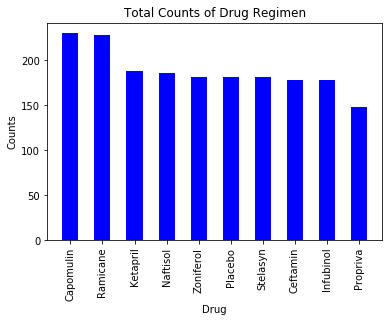

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_count = clean_study["Drug Regimen"].value_counts()

count = drug_count.values
drugs = drug_count.index
                 
plt.bar(drugs, count, color='blue', width= .5)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total Counts of Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Counts")

Text(0.5, 1.0, 'Distribution of Male vs. Female')

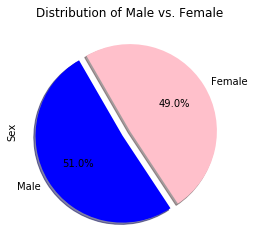

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_study["Sex"].value_counts()

colors=["blue", "pink"]

explode=[0.1,0]

gender_count.plot.pie(explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120);

plt.title("Distribution of Male vs. Female")

Text(0.5, 1.0, 'Distribution of Male vs. Female')

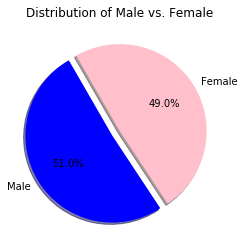

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = clean_study["Sex"].value_counts()

labels = gender_count.index

sizes = gender_count.values

colors=["blue", "pink"]

explode=[0.1,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Distribution of Male vs. Female")


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_size = clean_study.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_size = max_tumor_size.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor_size.merge(clean_study, on=["Mouse ID","Timepoint"], how='left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:] 
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane",:] 
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol",:] 
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin",:] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_tumor = capomulin["Tumor Volume (mm3)"]
quartile = capomulin_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quantile = quartile[0.75]
capomulin_IQR = upper_quantile - lower_quartile
capomulin_lower = lower_quartile - (1.5*capomulin_IQR)
capomulin_upper = upper_quantile + (1.5*capomulin_IQR)

print(f"Capomulin")
print(f"The lower quartile of Capomulin is: {lower_quartile}")
print(f"The upper quartile of Capolmulin is: {upper_quantile}")
print(f"The interquartile range of Capomulin is: {capomulin_IQR}")
print(f"Values below {capomulin_lower} could be outliers.")
print(f"Values above {capomulin_upper} could be outliers.")

ramicane_tumor = ramicane["Tumor Volume (mm3)"]
quartile = ramicane_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quantile = quartile[0.75]
ramicane_IQR = upper_quantile - lower_quartile
ramicane_lower = lower_quartile - (1.5*ramicane_IQR)
ramicane_upper = upper_quantile + (1.5*ramicane_IQR)

print(f"---------------------------------------------------------")
print("Ramicane")
print(f"The lower quartile of Ramicane is: {lower_quartile}")
print(f"The upper quartile of Ramicane is: {upper_quantile}")
print(f"The interquartile range of Ramicane is: {ramicane_IQR}")
print(f"Values below {ramicane_lower} could be outliers.")
print(f"Values above {ramicane_upper} could be outliers.")

infubinol_tumor = infubinol["Tumor Volume (mm3)"]
quartile = infubinol_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quantile = quartile[0.75]
infubinol_IQR = upper_quantile - lower_quartile
infubinol_lower = lower_quartile - (1.5*infubinol_IQR)
infubinol_upper = upper_quantile + (1.5*infubinol_IQR)

print(f"---------------------------------------------------------")
print("Infubinol")
print(f"The lower quartile of Infubinol is: {lower_quartile}")
print(f"The upper quartile of Infubinol is: {upper_quantile}")
print(f"The interquartile range of Infubinol is: {infubinol_IQR}")
print(f"Values below {infubinol_lower} could be outliers.")
print(f"Values above {infubinol_upper} could be outliers.")

ceftamin_tumor = ceftamin["Tumor Volume (mm3)"]
quartile = ceftamin_tumor.quantile([.25,.5,.75])
lower_quartile = quartile[0.25]
upper_quantile = quartile[0.75]
ceftamin_IQR = upper_quantile - lower_quartile
ceftamin_lower = lower_quartile - (1.5*ceftamin_IQR)
ceftamin_upper = upper_quantile + (1.5*ceftamin_IQR)

print(f"---------------------------------------------------------")
print("Ceftamin")
print(f"The lower quartile of Ceftamin is: {lower_quartile}")
print(f"The upper quartile of Ceftamin is: {upper_quantile}")
print(f"The interquartile range of Ceftamin is: {ceftamin_IQR}")
print(f"Values below {ceftamin_lower} could be outliers.")
print(f"Values above {ceftamin_upper} could be outliers.")

Capomulin
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capolmulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------------------
Ramicane
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------------------------
Infubinol
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
---------------------------------------------------------
Ceftamin
The lower quartile of Ceftamin is: 4

ValueError: cannot copy sequence with size 25 to array axis with dimension 8

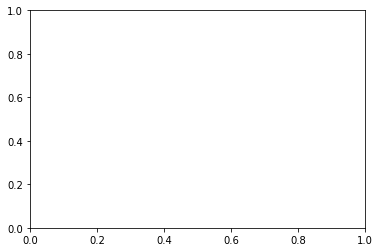

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

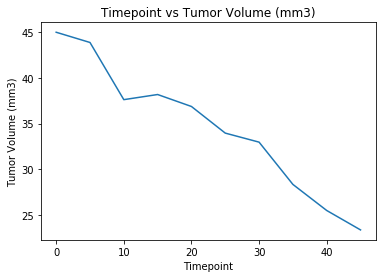

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]
capomulin_treatment
capomulin_mouse = clean_study.loc[clean_study["Mouse ID"] == "s185"]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

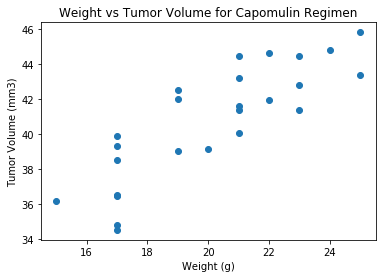

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]

average_volume = capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(average_volume["Weight (g)"],average_volume["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

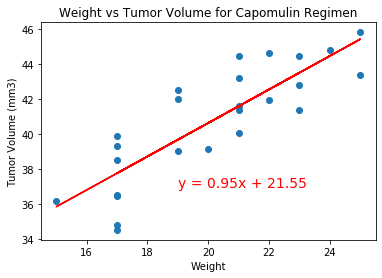

The correlation between both factors is 0.59
The r-squared is: 0.7088568047708717


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = clean_study.iloc[:,4]
tumor_volume = clean_study.iloc[:,6]
correlation = st.pearsonr(mouse_weight,tumor_volume)

x_values = average_volume["Weight (g)"]
y_values = average_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,37), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin Regimen")
plt.show()

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")